В прилагаемом файле представлены данные, собранные путем голосования за самые лучшие (или, по крайней мере, самые популярные) конфеты Хэллоуина. Обучите модель линейной многомерной регрессии. В качестве предикторов выступают поля: chocolate, fruity, caramel, peanutyalmondy, nougat, crispedricewafer, hard, bar, pluribus, sugarpercent, pricepercent, отклик — winpercent.

В качестве тренировочного набора данных используйте данные из файла, за иключением следующих конфет: Charleston Chew, Dum Dums. Обучите модель.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
data_loc = 'candy-data.csv'

In [3]:
data = pd.read_csv(data_loc)
data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,Y
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1


In [4]:
mask = (data['competitorname']!='Charleston Chew')&(data['competitorname']!='Dum Dums')
data_train_x = data[mask].iloc[:,1:12]
data_train_x.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860
1,1,0,0,0,1,0,0,1,0,0.604,0.511
2,0,0,0,0,0,0,0,0,0,0.011,0.116
3,0,0,0,0,0,0,0,0,0,0.011,0.511
4,0,1,0,0,0,0,0,0,0,0.906,0.511


In [5]:
data_test_x = data[~mask].iloc[:,1:12]
x = np.array([[0,0,0,1,0,1,1,0,1,0.855,0.649]])
# data_test_x = np.append([0,0,0,1,0,1,1,0,1,0.855,0.649])
data_test_x.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent
10,1,0,0,0,1,0,0,1,0,0.604,0.511
14,0,1,0,0,0,0,1,0,0,0.732,0.034


In [6]:
data_test_x.shape

(2, 11)

In [7]:
x.shape

(1, 11)

In [13]:
data_train_y = data[mask].iloc[:,12:13]
data_train_y.head()

,winpercent
0,66.971725
1,67.602936
2,32.261086
3,46.116505
4,52.341465


In [14]:
data_test_y = data[~mask].iloc[:,12:13]
data_test_y.head()

,winpercent
10,38.975037
14,39.460556


In [15]:
categorical_data = data[['chocolate','fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard','bar','pluribus']]
continuous_data = data[['sugarpercent','pricepercent','winpercent']]

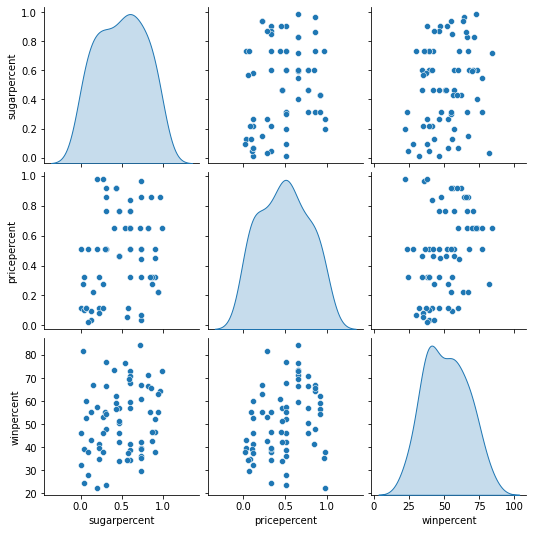

In [16]:
import seaborn as sns
sns.pairplot(data= continuous_data, diag_kind='kde')

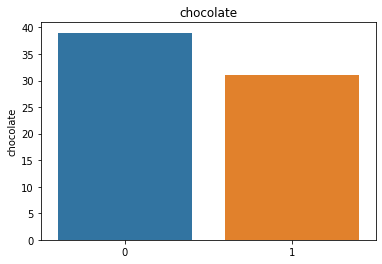

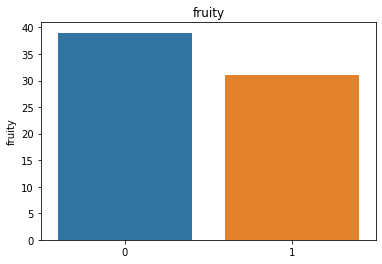

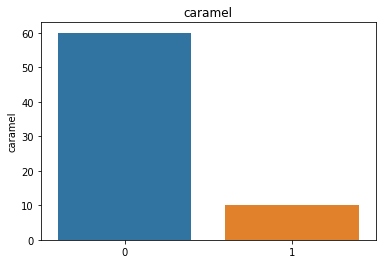

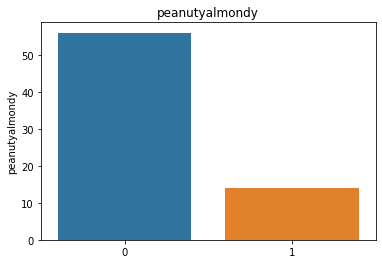

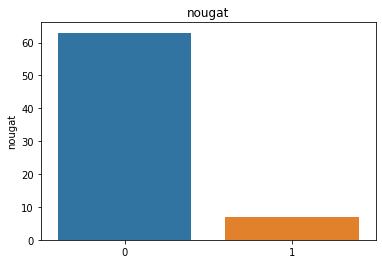

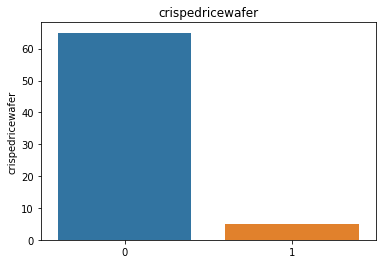

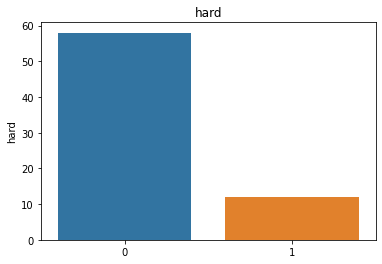

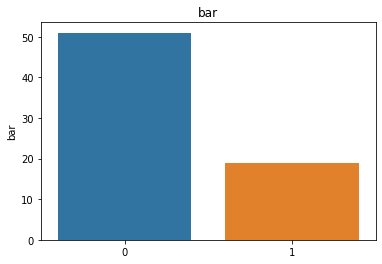

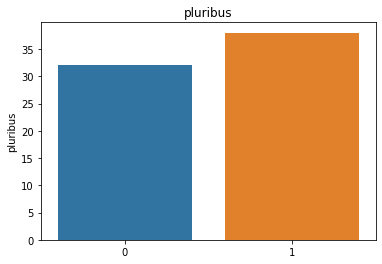

In [20]:
from matplotlib import pyplot as plt
for i in categorical_data.columns:
    sns.barplot(x = categorical_data[i].value_counts().index, y = categorical_data[i].value_counts()).set_title(i)
    plt.show()

<AxesSubplot:>

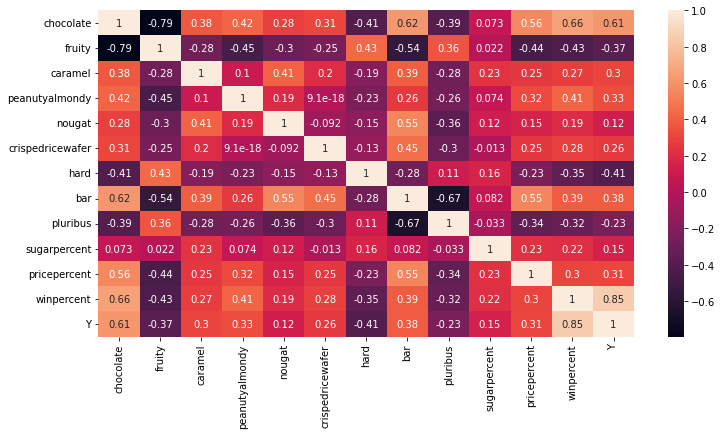

In [21]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(), annot = True)

In [22]:
# print(data.corr())

In [23]:
from sklearn.preprocessing import scale
data_train_x, data_train_y = scale(data_train_x), data_train_y
data_test_x = scale(data_test_x)
x = scale(x)

In [24]:
# missing_values = data_train_x == np.NAN
# data_train_x[missing_values == True]

In [25]:
model = LinearRegression()
model.fit(data_train_x, data_train_y)
print(model.score(data_train_x,data_train_y))

0.637386313642978


In [26]:
y_pred = model.predict(data_test_x)
y_pred

array([[55.77453576],
       [47.58180977]])

In [27]:
y_pred = model.predict(x)
y_pred

array([[51.67817276]])

Введите предсказанное значение winpercent для конфеты Charleston Chew: 55.77453576

Введите предсказанное значение winpercent для конфеты Dum Dums: 47.58180977

Введите предсказанное значение winpercent для конфеты с параметрами [0,0,0,1,0,1,1,0,1,0.885,0.649]: 51.67817276